In [3]:
import tensorflow as tf

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-07-22 20:57:17--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-07-22 20:57:17 (37.4 MB/s) - ‘moore.csv’ saved [2302/2302]



In [9]:
# load in the data
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [10]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [11]:
X = data[:,0].reshape(-1,1)  # First column as features, reshaped into a column vector, select all rows in first column
y = data[:,1] # Second column as target variable, all rows in second column

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

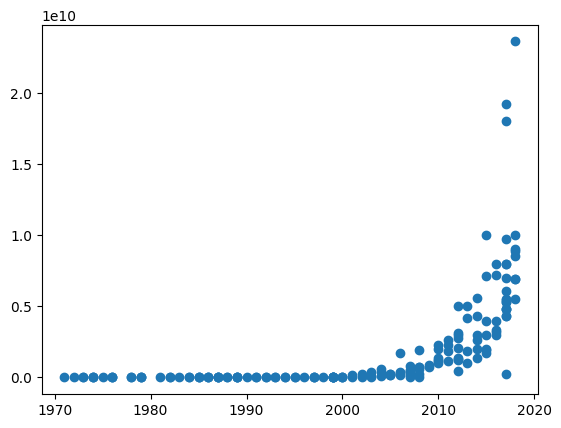

In [12]:
# plot the data
plt.scatter(X,y)
plt

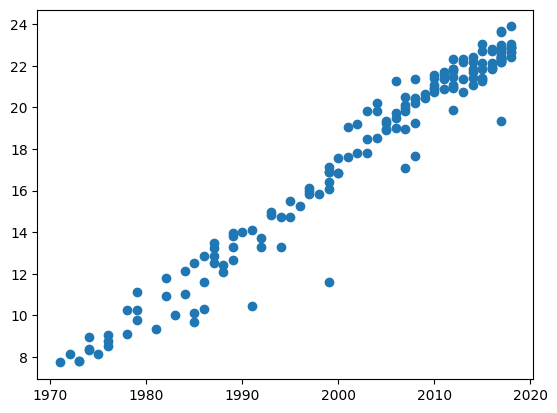

In [14]:
Y = np.log(y)
plt.scatter(X,Y)

In [16]:
X = X - X.mean() # 0 mean

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(1,),
    tf.keras.layers.Dense(1),
])

In [18]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

In [20]:
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [21]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 325.5455 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 312.0450 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 316.9563 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 306.0313 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 286.8466 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 305.7256 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 279.9603 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 272.3770 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 277.9353 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 261.2789 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - los

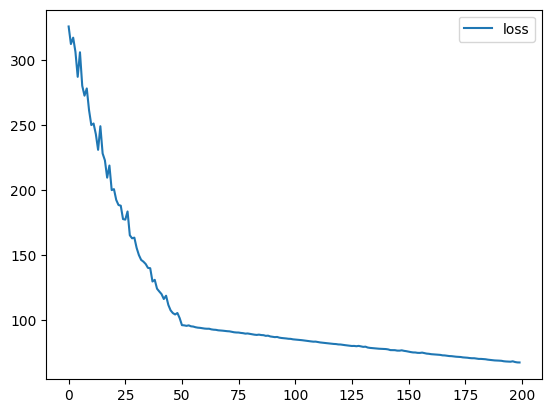

In [24]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [25]:
model.layers

In [26]:
model.layers[0].get_weights()

[array([[0.32235253]], dtype=float32), array([9.632433], dtype=float32)]

In [28]:
a = model.layers[0].get_weights()[0][0,0]
a

0.32235253

In [29]:
print("Time to double: ", np.log(2)/a)

Time to double:  2.1502768525823677
